In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)

## Mapping
### Use _mpg.csv_ to complete the following exercises:

In [18]:
data = pd.read_csv("data/mpg.csv")
data = data.assign(index=data.index)

#### Realize qualitative plots for data of class == subcompact

In [19]:
subcom = data[data['class'] == 'subcompact']

- map x to manufacturer and y to row index

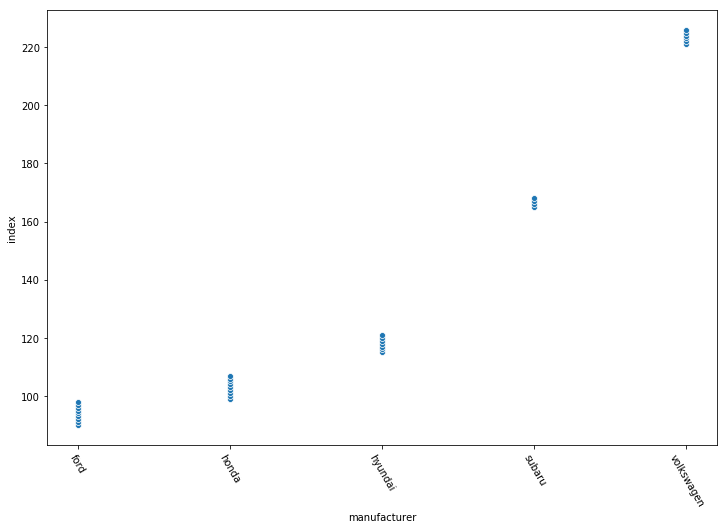

In [20]:
g = sns.scatterplot(x="manufacturer", y="index", data=subcom)
_ = plt.xticks(rotation=-60)

- map color to manufacturer and y to row index

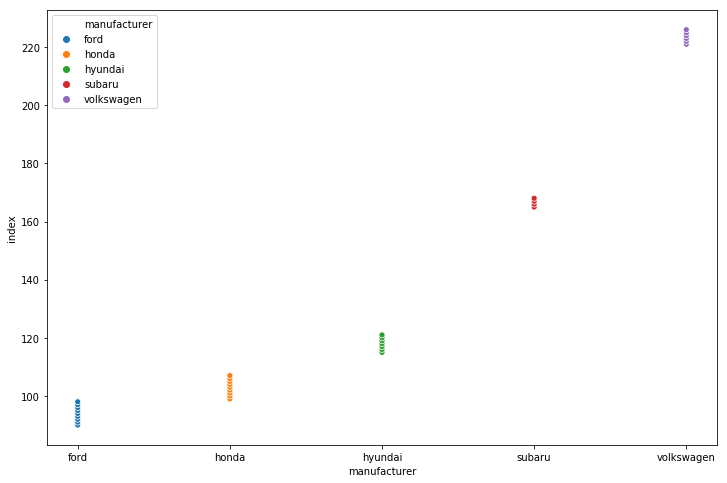

In [21]:
g = sns.scatterplot(y="index", x="manufacturer", hue="manufacturer", data=subcom)

- realize scatter plots of highway efficiency (‘hwy’) vs displacement

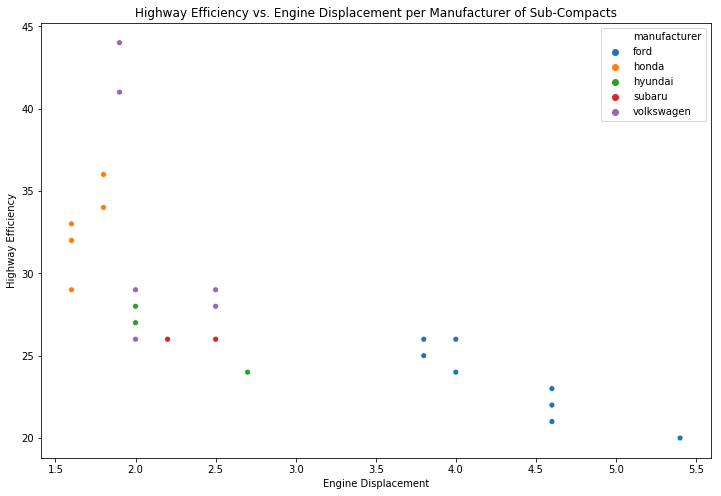

In [22]:
g = sns.scatterplot(x="displ", y="hwy", hue="manufacturer", data=subcom)
plt.xlabel("Engine Displacement")
plt.ylabel("Highway Efficiency")
plt.title("Highway Efficiency vs. Engine Displacement per Manufacturer of Sub-Compacts")
None

---

#### Simple scatter plot, do not code the classes of vehicle

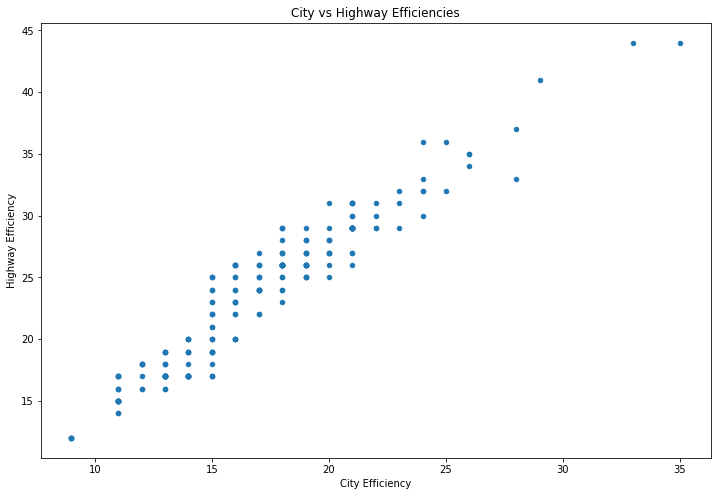

In [23]:
data.plot.scatter(x="cty", y="hwy")
plt.xlabel("City Efficiency")
plt.ylabel("Highway Efficiency")
plt.title("City vs Highway Efficiencies")
None

#### Map each class to:

- different shape/symbol

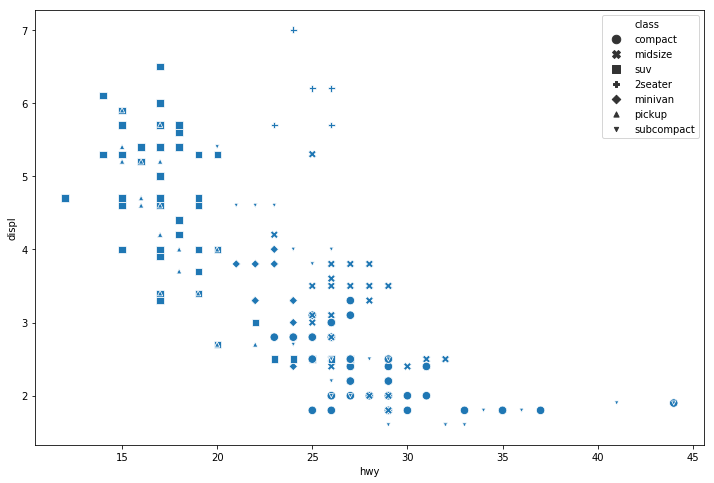

In [24]:
g = sns.scatterplot(x="hwy", y="displ", style="class", size="class", data=data)

- color or brightness and shape/symbol

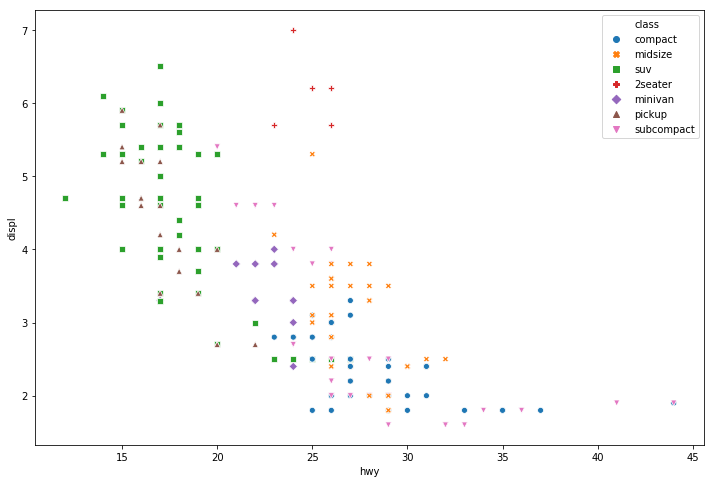

In [25]:
g = sns.scatterplot(x="hwy", y="displ", hue="class", style="class", data=data)

- a brightness determined by mean displacement for the class

In [26]:
mean_displ = data.groupby("class").mean()['displ'].reset_index()

In [27]:
def get_displ(x):
    return mean_displ[mean_displ['class'] == x]['displ'].values[0]

In [28]:
df_special = data.assign(mean_displ = data['class']
                                         .apply(lambda x: get_displ(x)))

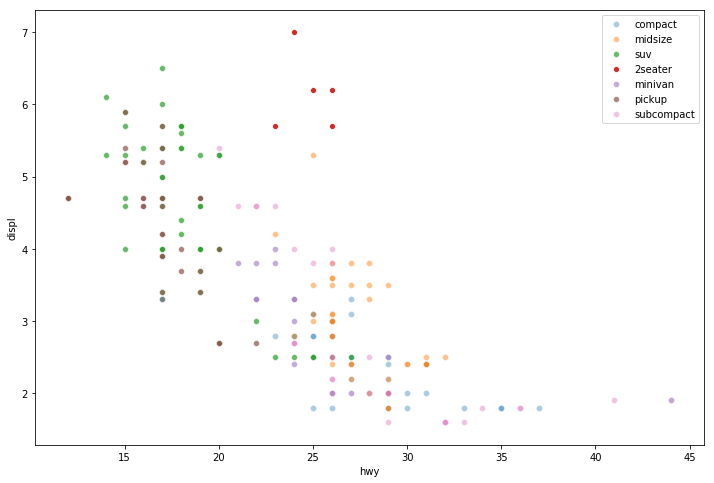

In [29]:
# g = sns.scatterplot(x="hwy", y="displ", data=df_special)

for cls in df_special['class'].unique():
    current_alpha = get_displ(cls)/max(mean_displ['displ'])
    g=sns.scatterplot(x="hwy", y="displ", alpha=current_alpha, label=cls,
                      data=df_special[df_special['class']==cls])

g.legend()
None

- shape whose size is determined by mean displacement for the class

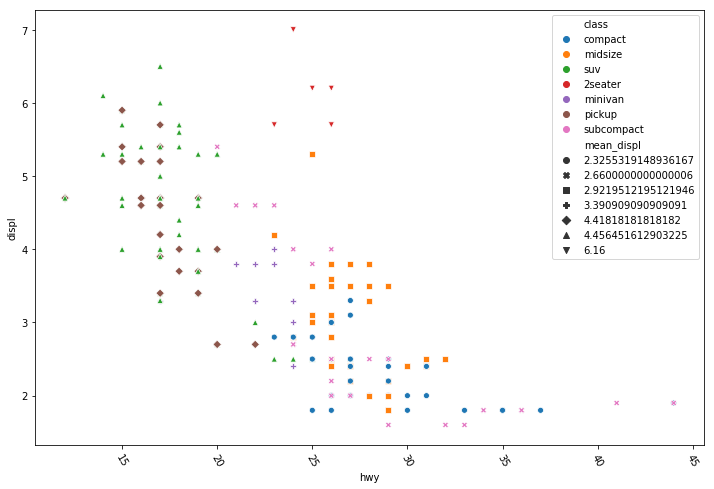

In [30]:
g = sns.scatterplot(x='hwy', y='displ', hue='class', style='mean_displ',
                        data=df_special)
_ = plt.xticks(rotation=-60)